# 1.Setup and EDA

In [ ]:


# Load the data
tpd <- read.csv("TrainingPromoData.csv")

# Drop the 'empid' column
tpd <- tpd[, !(names(tpd) %in% c("empid"))]

# Print the resulting dataframe
print(head(tpd,5))

# tpd$disthome <- scale(tpd$disthome, center = TRUE, scale = TRUE)
# tpd$testscore <- scale(tpd$testscore, center = TRUE, scale = TRUE)

  promoted training manager raise     salary children  mstatus age    sex edu
1       No       No      No   Yes Under $20k        2 divorced  49   Male  12
2       No      Yes      No    No   $40-$80k        0 divorced  32 Female  14
3      Yes       No      No   Yes   $20-$40k        2  married  53 Female   9
4      Yes      Yes      No    No Under $20k        2   single  48   Male  10
5       No       No      No   Yes Under $20k        0   single  60 Female   8
  vacation weight height hrfriend cxofriend          insurance flexspend
1       12 142.84  56.24      Yes        No           Medicaid       Yes
2        9 199.62  53.72       No        No            Covered       Yes
3       11 117.66  61.75      Yes       Yes Covered & Medicaid        No
4       11 171.88  61.06       No        No           Medicaid       Yes
5        9 118.87  66.27       No        No           Medicaid        No
  retcont  race disthome testscore
1      No white       20      59.0
2      No white        2

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# EDA
# Check distribution of Training
table(tpd$training)


  No  Yes 
3709 2291 

In [ ]:
# Compute summary statistics partitioned by Training for numerical variables only
training_summary_numerical <- by(tpd, tpd$training, function(x) summary(x[sapply(x, is.numeric)]))

# Print summary statistics for numerical variables for each training group
for (i in 1:length(training_summary_numerical)) {
  cat("Training Group:", names(training_summary_numerical)[i], "\n")
  print(training_summary_numerical[[i]])
}


Training Group: No 
    children          age             edu           vacation    
 Min.   :0.000   Min.   :18.00   Min.   :-1.00   Min.   : 6.00  
 1st Qu.:1.000   1st Qu.:35.00   1st Qu.:10.00   1st Qu.: 8.00  
 Median :1.000   Median :45.00   Median :12.00   Median :10.00  
 Mean   :1.348   Mean   :43.26   Mean   :11.51   Mean   :10.31  
 3rd Qu.:2.000   3rd Qu.:52.00   3rd Qu.:13.00   3rd Qu.:12.00  
 Max.   :5.000   Max.   :71.00   Max.   :30.00   Max.   :18.00  
     weight           height         disthome       testscore     
 Min.   : 44.72   Min.   :52.96   Min.   :11.00   Min.   : 21.00  
 1st Qu.:127.16   1st Qu.:59.01   1st Qu.:18.00   1st Qu.: 56.00  
 Median :153.29   Median :63.55   Median :26.00   Median : 67.50  
 Mean   :158.41   Mean   :64.48   Mean   :25.62   Mean   : 66.21  
 3rd Qu.:182.10   3rd Qu.:69.09   3rd Qu.:33.00   3rd Qu.: 77.50  
 Max.   :450.12   Max.   :81.64   Max.   :40.00   Max.   :100.00  
Training Group: Yes 
    children         age           

In [ ]:
# Print tables for categorical variables partitioned by training
for (col in names(tpd)) {
  if (is.character(tpd[[col]])) {
    cat(col, "partitioned by training:\n")
    for (training_level in unique(tpd$training)) {
      cat("\nTraining:", training_level, "\n")
      tbl <- table(tpd[tpd$training == training_level, col])
      prop_tbl <- prop.table(tbl)
      print(prop_tbl)
    }
    cat("\n")
  }
}


promoted partitioned by training:

Training: No 

       No       Yes 
0.3680237 0.6319763 

Training: Yes 

       No       Yes 
0.3190746 0.6809254 

training partitioned by training:

Training: No 

No 
 1 

Training: Yes 

Yes 
  1 

manager partitioned by training:

Training: No 

      No      Yes 
0.869237 0.130763 

Training: Yes 

       No       Yes 
0.8345701 0.1654299 

raise partitioned by training:

Training: No 

       No       Yes 
0.5847937 0.4152063 

Training: Yes 

       No       Yes 
0.7101702 0.2898298 

salary partitioned by training:

Training: No 

    > $80k   $20-$40k   $40-$80k Under $20k 
0.07252629 0.20032354 0.14316527 0.58398490 

Training: Yes 

    > $80k   $20-$40k   $40-$80k Under $20k 
0.08904409 0.20558708 0.17983413 0.52553470 

mstatus partitioned by training:

Training: No 

 divorced   married    single 
0.2453492 0.1952009 0.5594500 

Training: Yes 

 divorced   married    single 
0.2038411 0.2418158 0.5543431 

sex partitioned by training:


In [ ]:
system('sudo apt install tableone')

In [ ]:
install.packages('tableone')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘minqa’, ‘numDeriv’, ‘mitools’, ‘Rcpp’, ‘RcppArmadillo’, ‘proxy’, ‘gdata’, ‘survey’, ‘e1071’, ‘zoo’, ‘gmodels’, ‘labelled’




In [ ]:
install.packages('Matching')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 2.Preprocessing

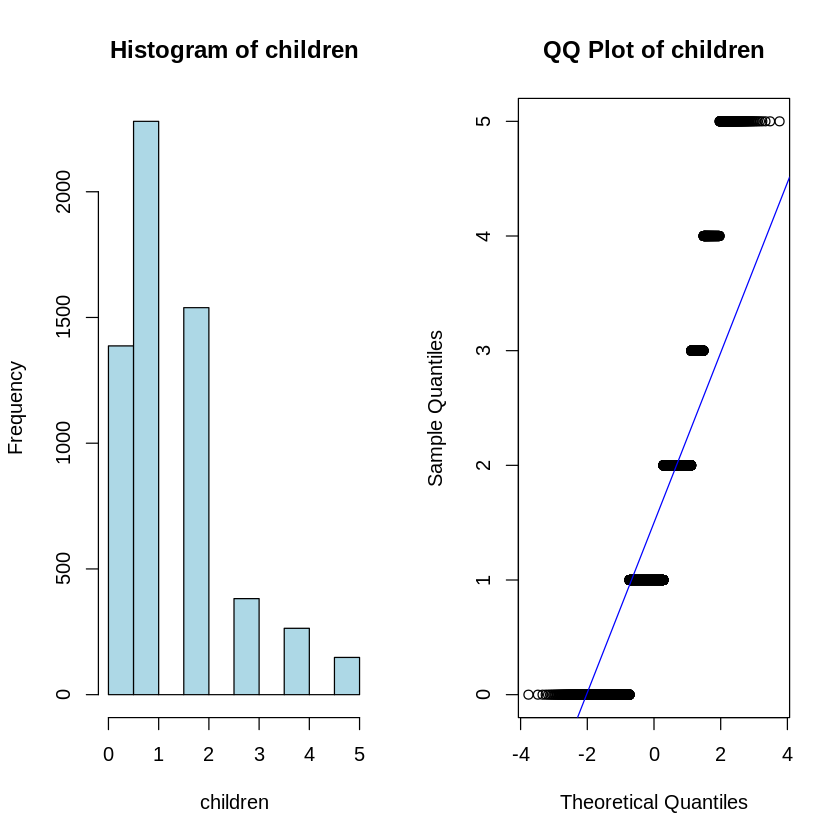

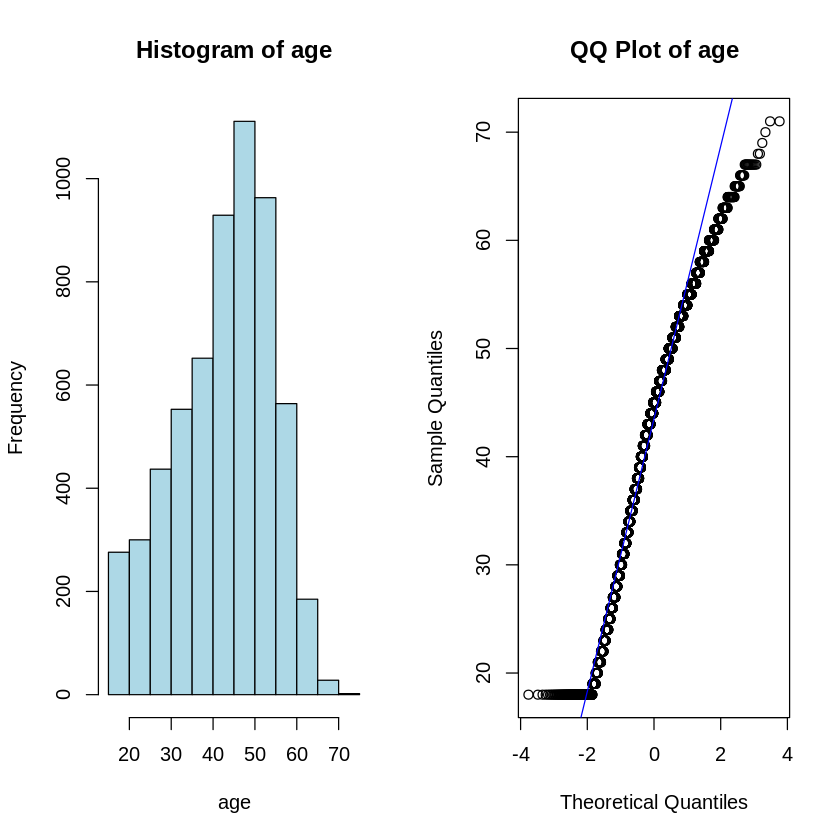

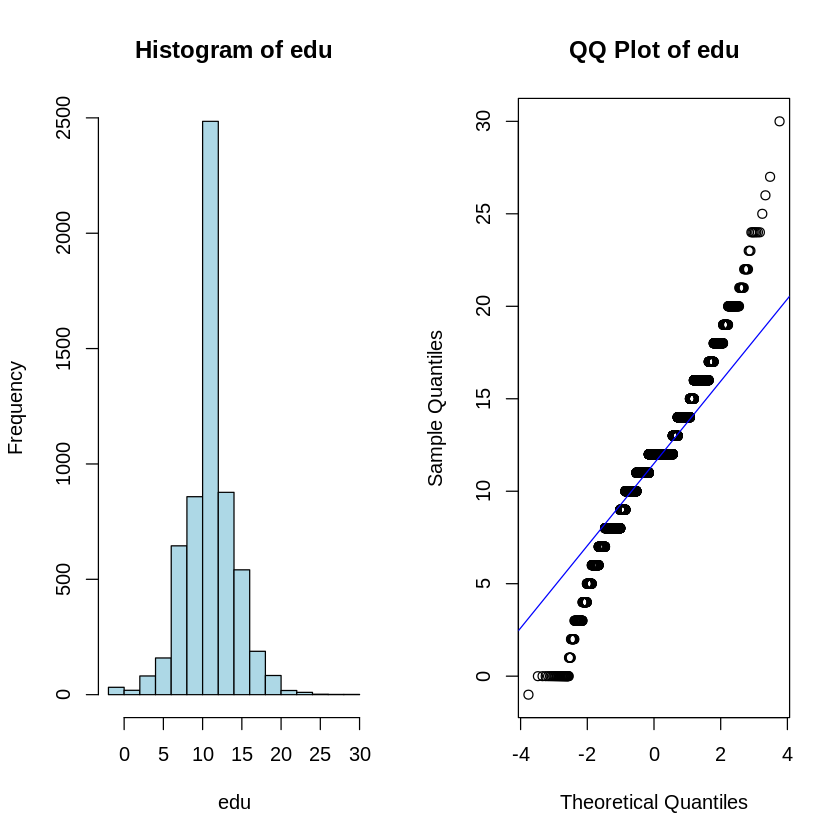

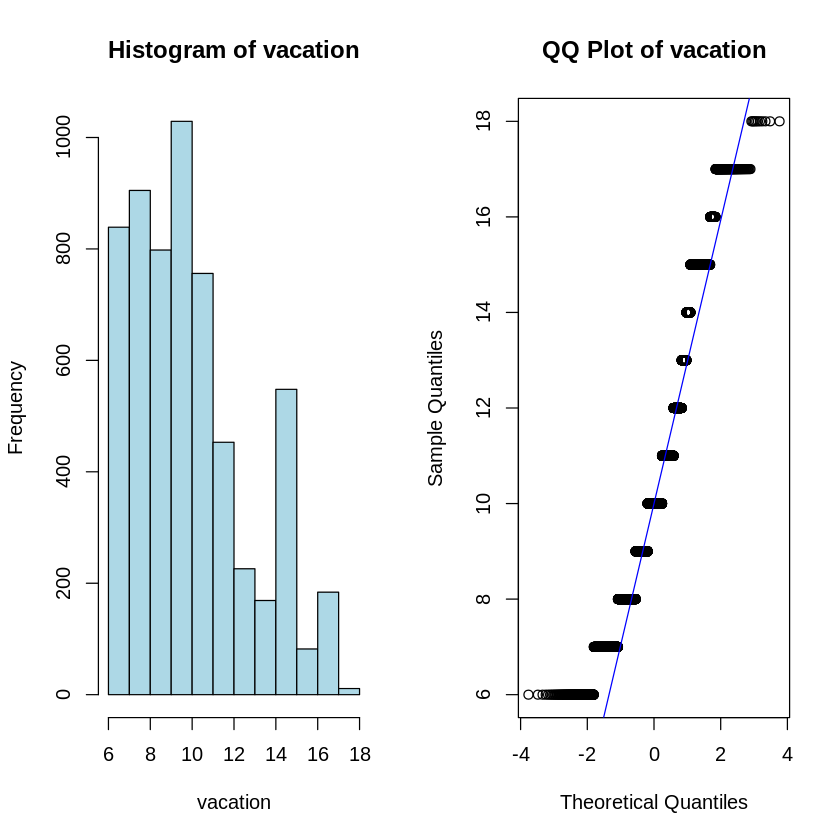

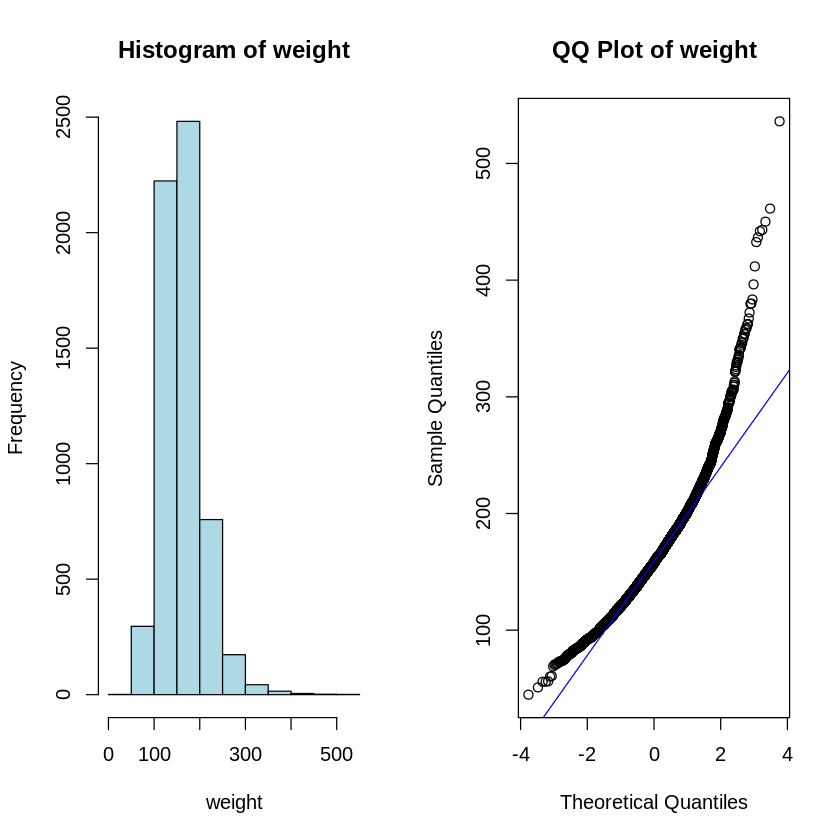

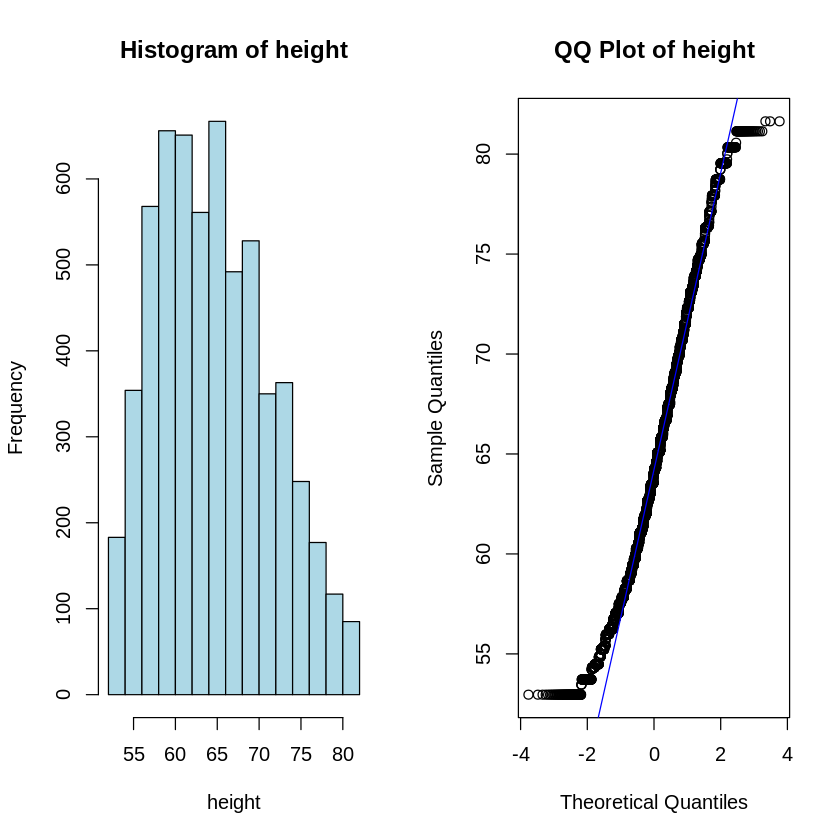

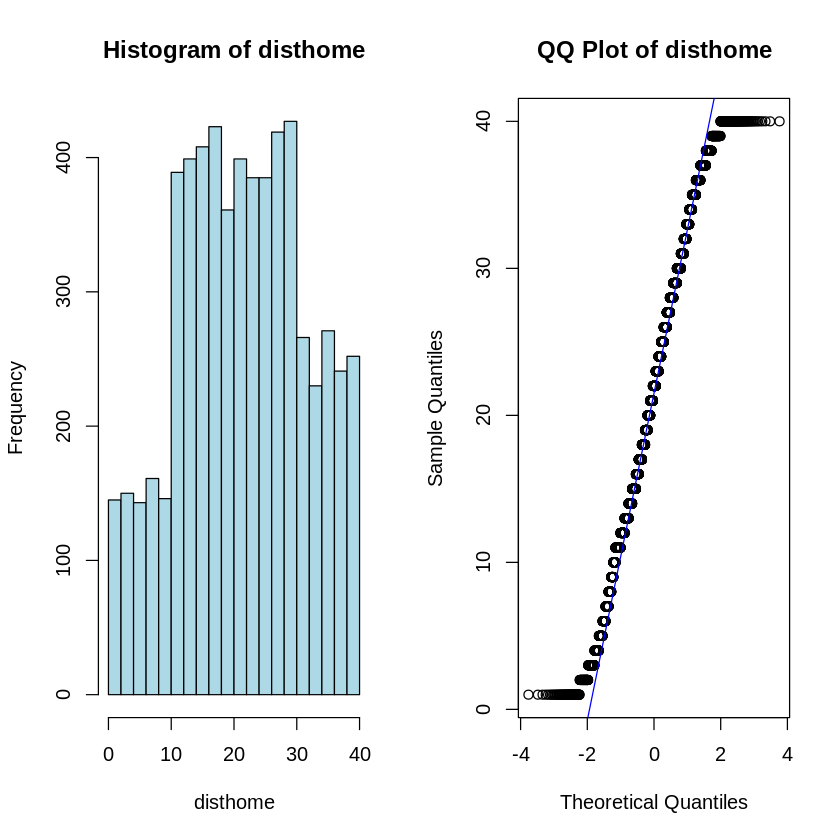

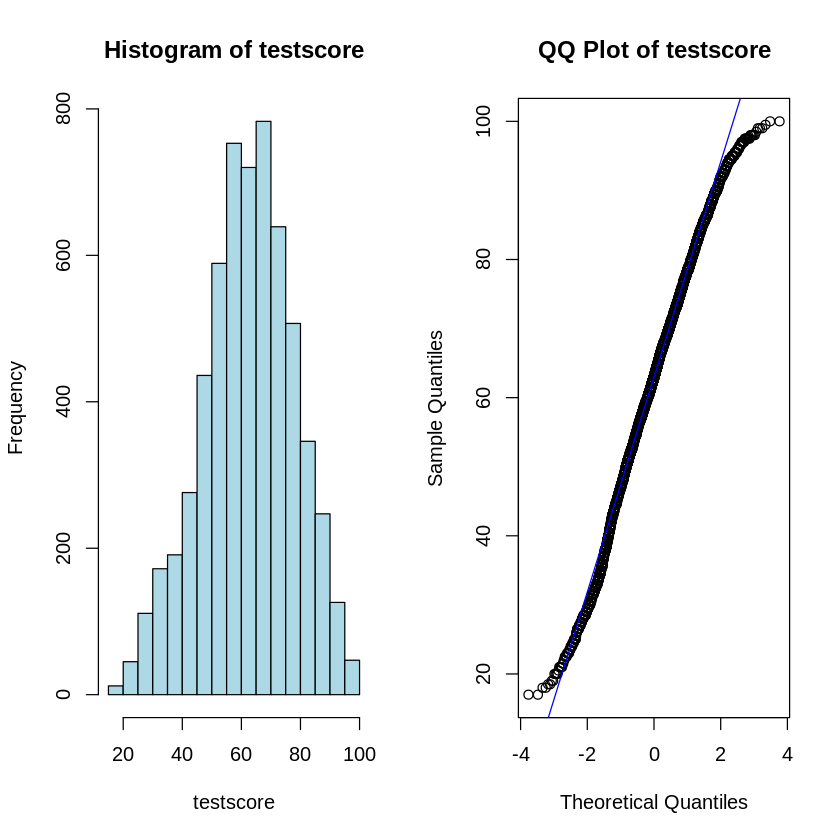

In [ ]:
# EDA2 for regression

#checking skewness
# Load necessary libraries
library(ggplot2)

# Define variables to plot
variables <- c("children", "age", "edu", "vacation", "weight", "height", "disthome", "testscore")

# Plot histograms and QQ plots for each variable
for (var in variables) {
  # Create a new plot window
  par(mfrow = c(1, 2))

  # Histogram
  hist(tpd[[var]], main = paste("Histogram of", var), xlab = var, col = "lightblue")

  # QQ plot
  qqnorm(tpd[[var]], main = paste("QQ Plot of", var))
  qqline(tpd[[var]], col = "blue")

  # Reset plot window
  par(mfrow = c(1, 1))
}

In [ ]:
install.packages('gplots')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘caTools’





Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




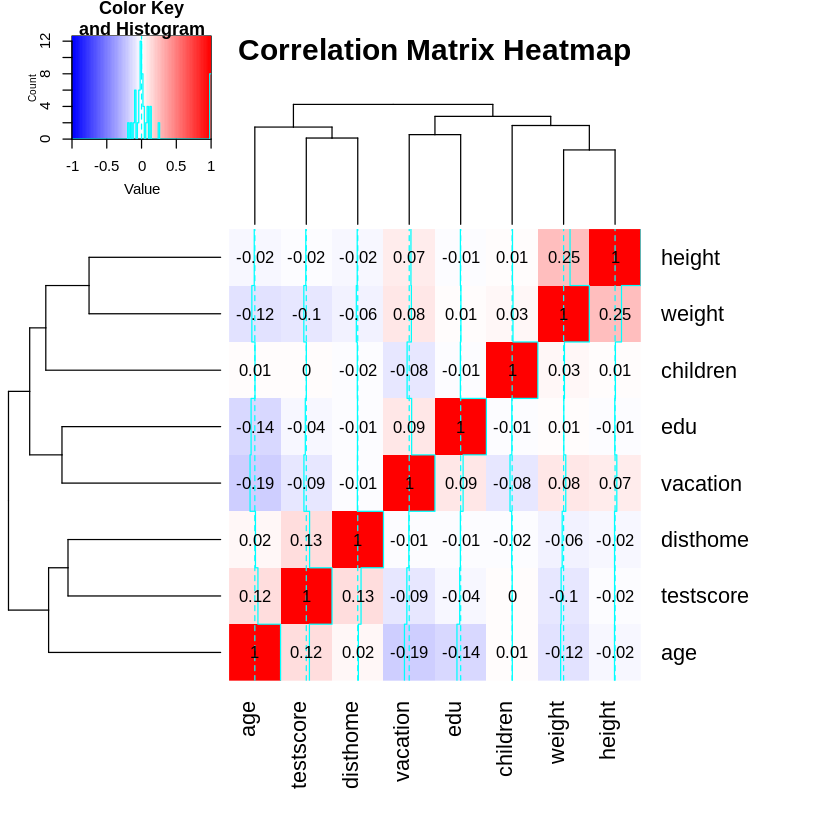

In [ ]:
# Load required library
library(gplots)

# Calculate correlation matrix
correlation_matrix <- cor(tpd[, c("children", "age", "edu", "vacation", "weight", "height", "disthome", "testscore")])

# Create heatmap with correlation values
heatmap.2(correlation_matrix,
          cellnote = round(correlation_matrix, 2),  # Display rounded correlation values
          notecol = "black",                        # Set text color for correlation values
          col = colorRampPalette(c("blue", "white", "red"))(100),
          symm = TRUE,
          margins = c(8, 10),                       # Set margins for labels
          main = "Correlation Matrix Heatmap")


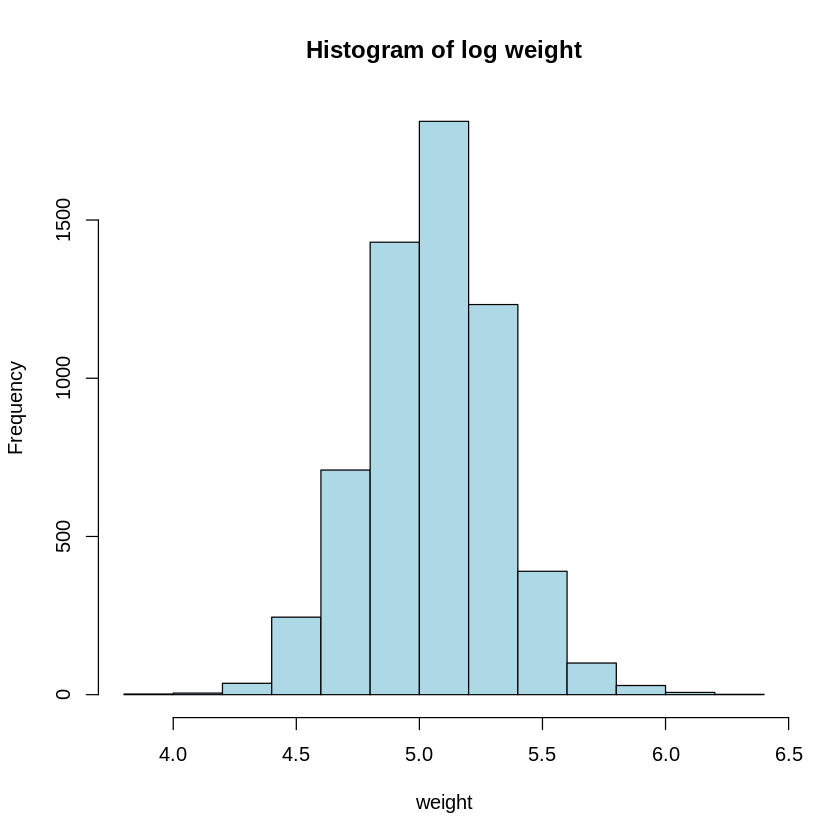

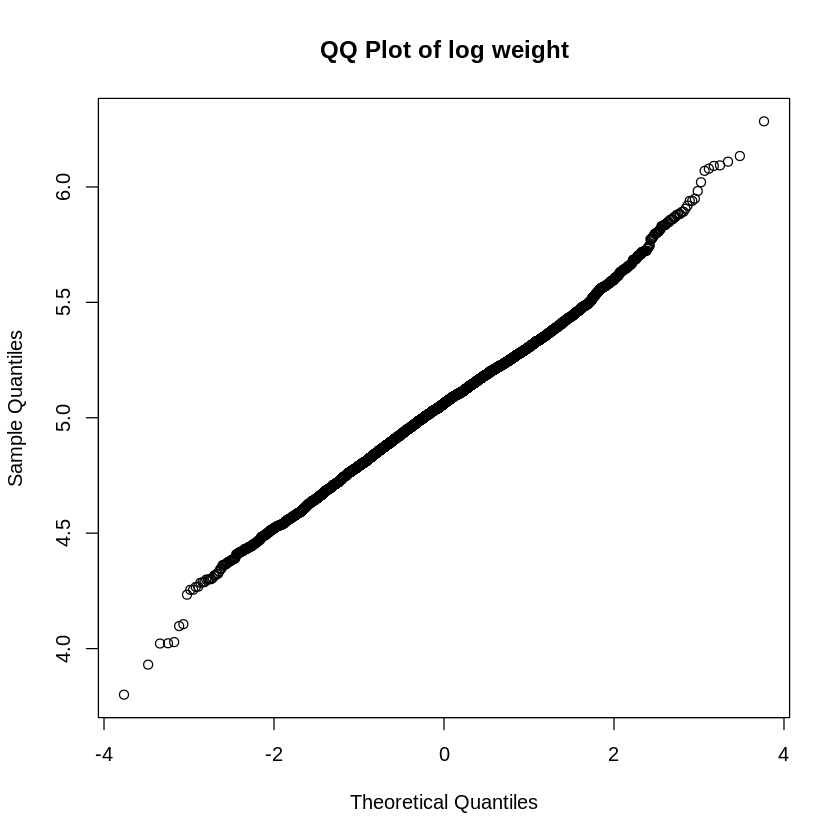

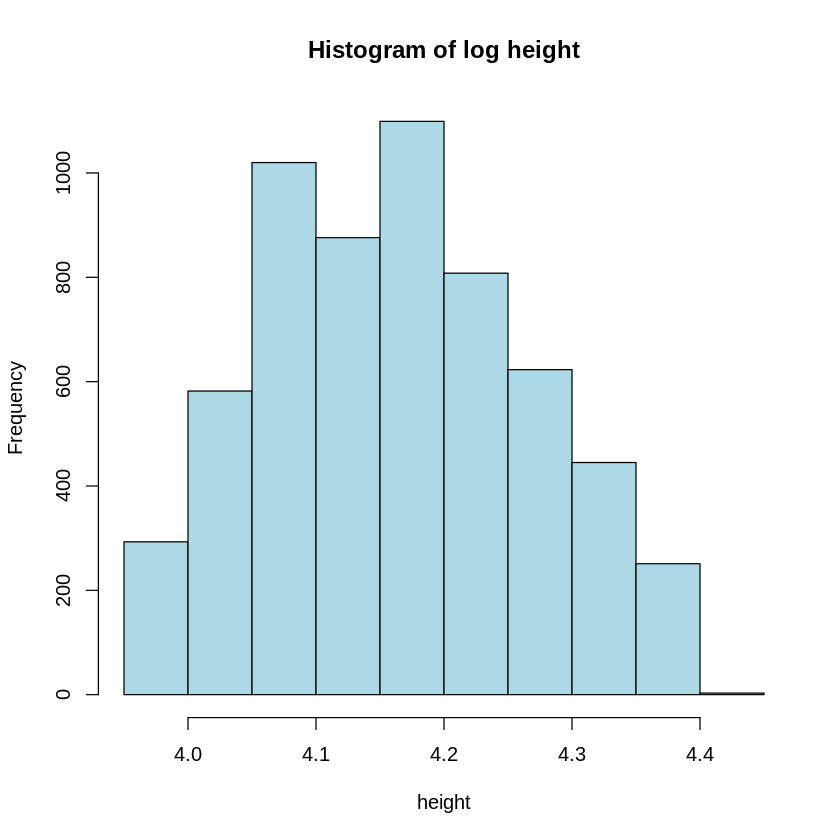

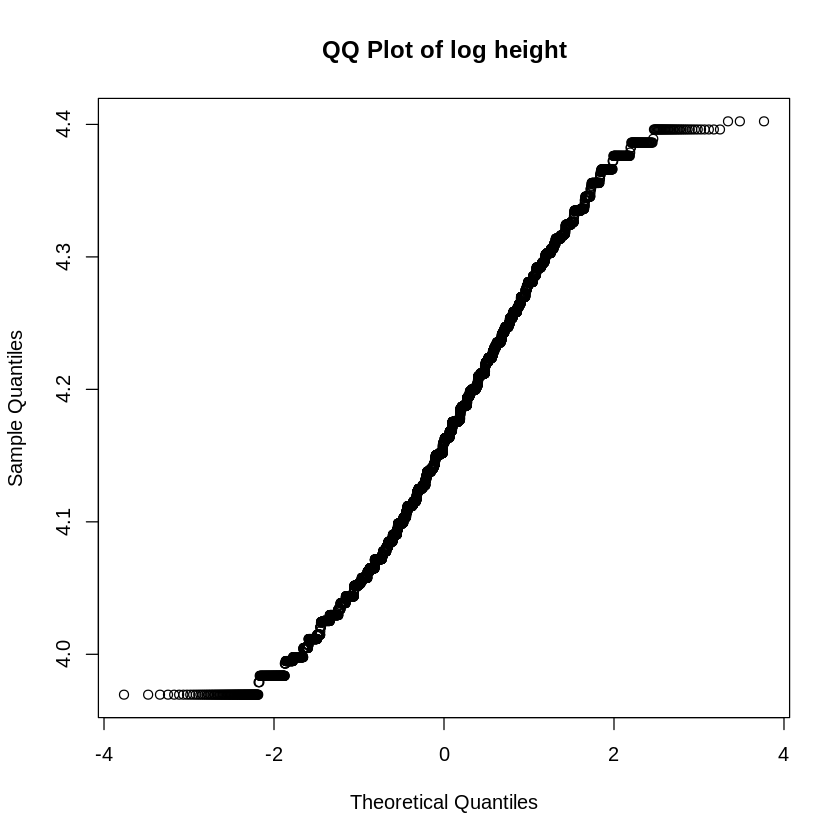

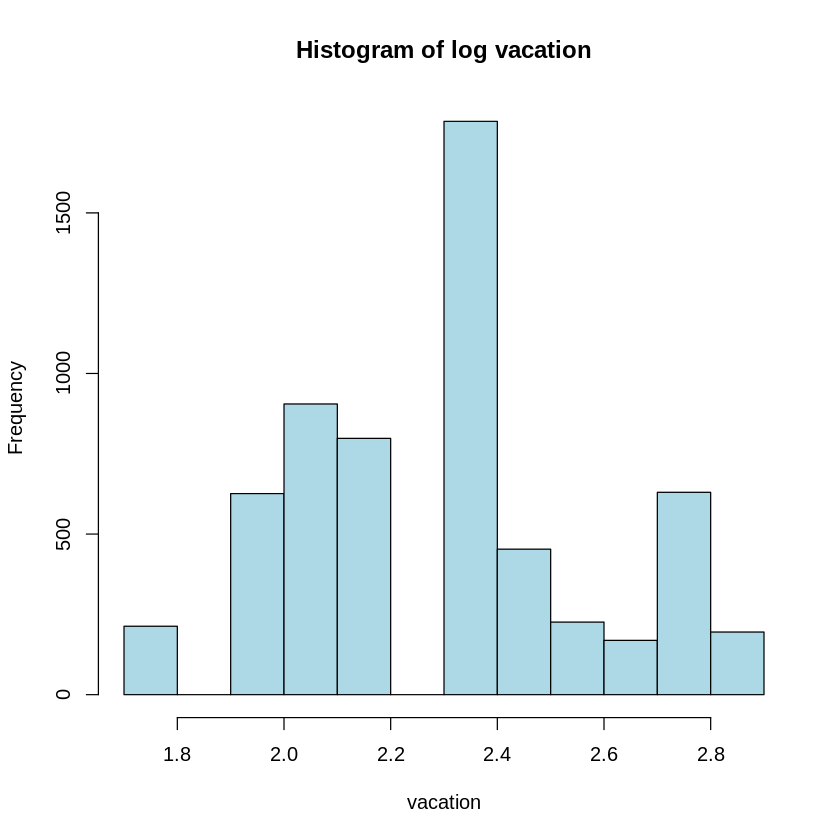

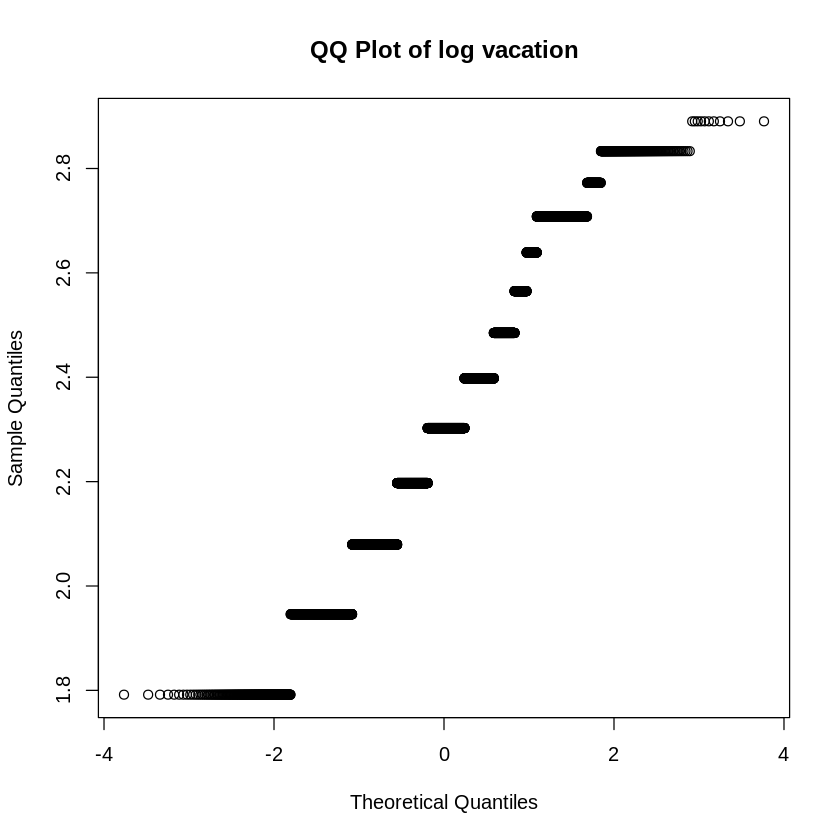

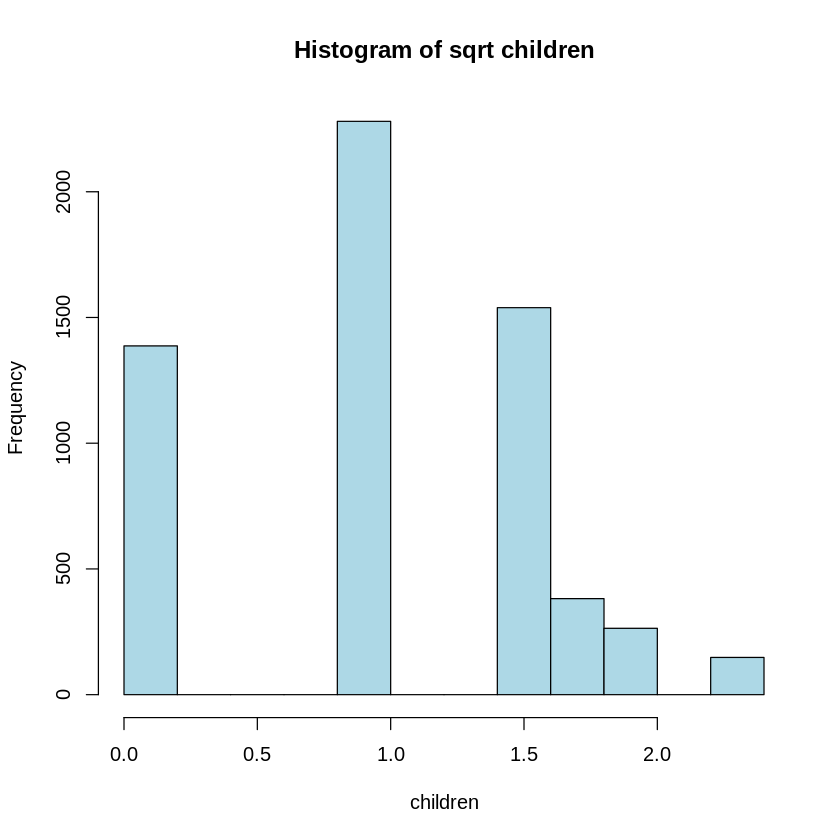

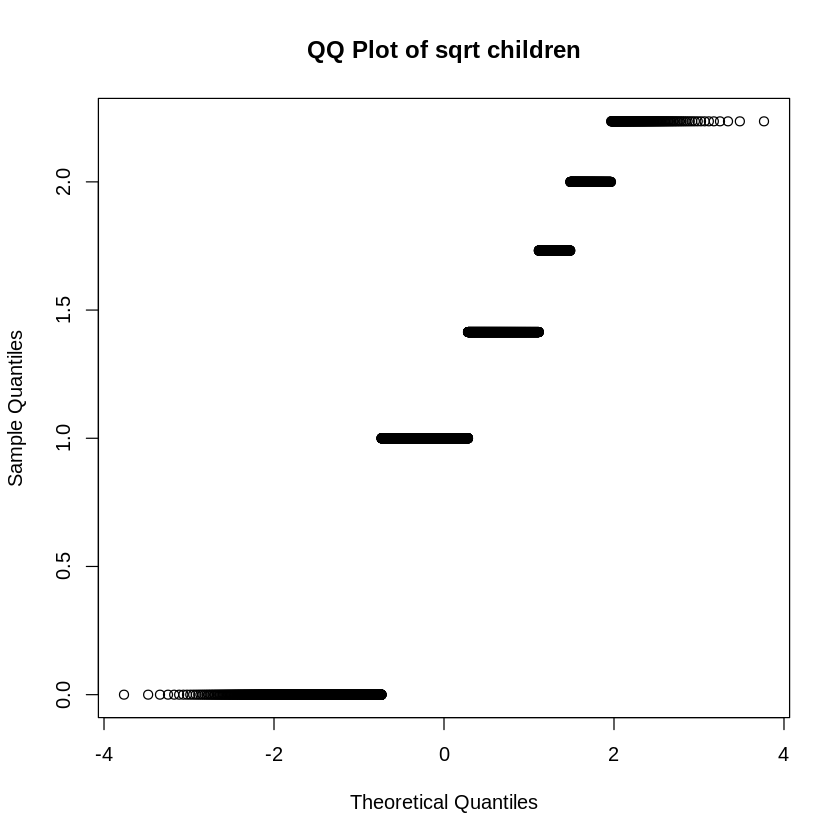

In [ ]:
#no high correlation, transform weight,height, vacation, children
var = 'weight'
hist(log(tpd[[var]]), main = paste("Histogram of log", var), xlab = var, col = "lightblue"); qqnorm(log(tpd[[var]]), main = paste("QQ Plot of log", var))
var = 'height'
hist(log(tpd[[var]]), main = paste("Histogram of log", var), xlab = var, col = "lightblue"); qqnorm(log(tpd[[var]]), main = paste("QQ Plot of log", var))
var = 'vacation'
hist(log(tpd[[var]]), main = paste("Histogram of log", var), xlab = var, col = "lightblue"); qqnorm(log(tpd[[var]]), main = paste("QQ Plot of log", var))
var = 'children'
hist(sqrt(tpd[[var]]), main = paste("Histogram of sqrt", var), xlab = var, col = "lightblue"); qqnorm(sqrt(tpd[[var]]), main = paste("QQ Plot of sqrt", var))

In [ ]:
psModel <- glm(formula = (promoted == "Yes") ~ manager+raise+salary+children+mstatus+age+sex+edu+vacation+weight+height+hrfriend+cxofriend+insurance+flexspend+retcont+race+testscore+disthome,family = binomial(link = "logit"), data = tpd)

# 3. Pre-Matching RCT Data Assessment

In [ ]:
## change the categorical variable to numerical variable
tpd$manager <- as.factor(tpd$manager)
tpd$mstatus <- as.factor(tpd$mstatus)
tpd$sex <- as.factor(tpd$sex)
tpd$insurance <- as.factor(tpd$insurance)
tpd$flexspend <- as.factor(tpd$flexspend)
tpd$retcont <- as.factor(tpd$retcont)
tpd$race <- as.factor(tpd$race)

# the salary is a ordinary categorical variable
tpd$salary <- factor(tpd$salary, levels = c("Under $20k", "$20-$40k", "$40-$80k", "> $80k"), ordered = TRUE)

## 3.1 comparing propensity score distribution:

In [ ]:
psModel <- glm(formula = (training == "Yes") ~ manager + raise + salary + children +
               mstatus + age + sex + edu + vacation + weight +
               height + hrfriend + cxofriend + insurance +
               flexspend + retcont + race + disthome + testscore,
               family = binomial(link = "logit"),
               data = tpd)


## Predicted probability of being assigned to Train
tpd$pTrain <- predict(psModel, type = "response")

## Predicted probability of being assigned to no Train
tpd$pNoTrain <- 1 - tpd$pTrain

#create plot to check overlap
hTrain = hist(tpd$pTrain[tpd$training=="Yes"], plot=FALSE,breaks=20)
hNoTrain = hist(tpd$pTrain[tpd$training=="No"], plot=FALSE,breaks=20)
hNoTrain$counts = - hNoTrain$counts

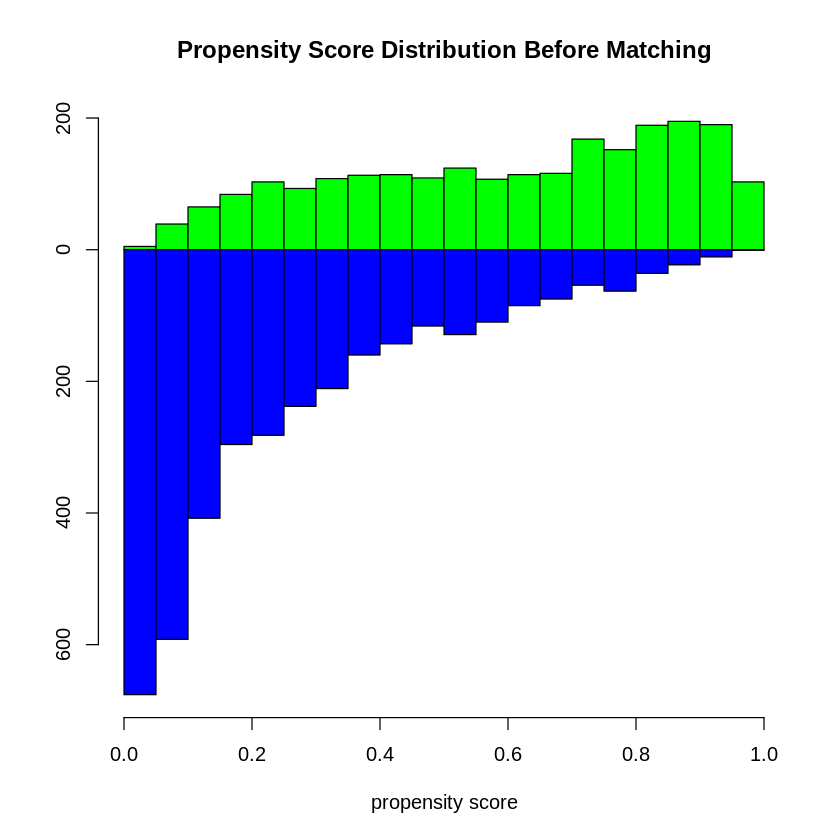

In [ ]:
## distribution without PSM

#create plot to check overlap
hTrain = hist(tpd$pTrain[tpd$training=="Yes"], plot=FALSE,breaks=20)
hNoTrain = hist(tpd$pTrain[tpd$training=="No"], plot=FALSE,breaks=20)
hNoTrain$counts = - hNoTrain$counts
hmax = max(hTrain$counts)
hmin = min(hNoTrain$counts)
plotx = c(hTrain$breaks, hNoTrain$breaks)
xmax = max(plotx)
xmin = min(plotx)
plot(hTrain, ylim=c(hmin, hmax), col="Green", xlim=c(xmin, xmax), xlab='propensity score',main = "Propensity Score Distribution Before Matching",yaxt='n',ylab='')
axis(2, at = axTicks(2), labels = abs(axTicks(2)))
lines(hNoTrain, col="blue")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


## 
##  Matching (Version 4.10-14, Build Date: 2023-09-13)
##  See https://www.jsekhon.com for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##




ERROR: Error in as.vector(x, mode): cannot coerce type 'closure' to vector of type 'any'


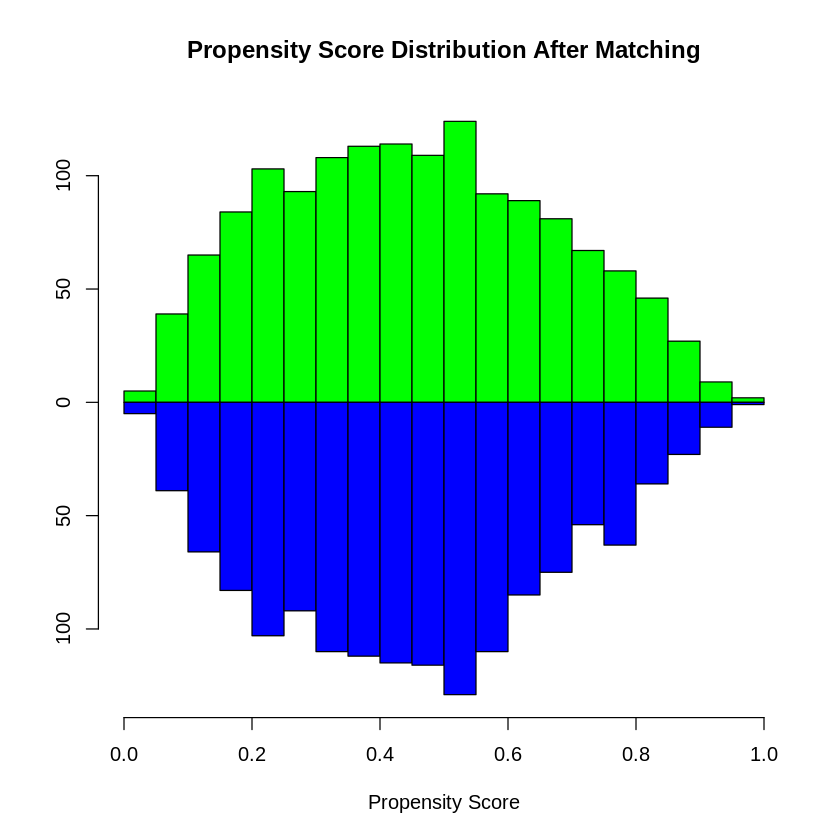

In [ ]:
install.packages("MASS")
library(Matching)
library(MASS)
library(tableone)
## distribution with PSM

set.seed(314159) ## Set random number seed

## Perform 1:1 Propensity Score Matching
listPSMatch <- Match(Tr = (tpd$training == "Yes"), X = log(tpd$pTrain / tpd$pNoTrain),
M = 1, caliper = 0.2, replace = FALSE, ties = TRUE, version = "fast")

## Extract matched data
tpdPSMatched <- tpd[unlist(listPSMatch[c("index.treated","index.control")]), ]

## Show distribution with PSM
hTrainMatched <- hist(tpdPSMatched$pTrain[tpdPSMatched$training == "Yes"], plot = FALSE, breaks = 20)
hNoTrainMatched <- hist(tpdPSMatched$pTrain[tpdPSMatched$training == "No"], plot = FALSE, breaks = 20)
hNoTrainMatched$counts <- -hNoTrainMatched$counts
hmaxMatched <- max(hTrainMatched$counts)
hminMatched <- min(hNoTrainMatched$counts)

plot(hTrainMatched, col = "Green", ylim = c(hminMatched, hmaxMatched), xlim = range(c(hTrainMatched$breaks, hNoTrainMatched$breaks)), xlab = 'Propensity Score', main = "Propensity Score Distribution After Matching", yaxt = 'n', ylab = '')
axis(2, at = axTicks(2), labels = abs(axTicks(2)))  # Add axis labels on the left side
lines(hNoTrainMatched, col = "Blue")  # Add the NoTrain distribution


## Construct a table
tabPSMatched <- CreateTableOne(vars = vars, strata = "training", data = tpdPSMatched, test = FALSE)

## Show table with SMD
print(tabPSMatched, smd = TRUE)

##3.2 SMD details

In [ ]:
vars <- names(tpd)[!(names(tpd) %in% c("training", "promoted"))]
vars

# install.packages(c("tableone", "Matching"))
# install.packages("RcppArmadillo")
# install.packages("survey")

# Matching package
library(Matching)
# TableOne package
library(tableone)

# Construct a Table 1
tabUnmatched <- CreateTableOne(vars = vars, strata = "training", data = tpd, test = FALSE)

# Show table with SMD
print(tabUnmatched, smd = TRUE)


[1] "manager"   "raise"     "salary"    "children"  "mstatus"   "age"      
 [7] "sex"       "edu"       "vacation"  "weight"    "height"    "hrfriend" 
[13] "cxofriend" "insurance" "flexspend" "retcont"   "race"      "disthome" 
[19] "testscore" "pTrain"    "pNoTrain"

                        Stratified by training
                         No             Yes            SMD   
  n                        3709           2291               
  manager = Yes (%)         485 (13.1)     379 (16.5)   0.098
  raise = Yes (%)          1540 (41.5)     664 (29.0)   0.265
  salary (%)                                            0.134
     Under $20k            2166 (58.4)    1204 (52.6)        
     $20-$40k               743 (20.0)     471 (20.6)        
     $40-$80k               531 (14.3)     412 (18.0)        
     > $80k                 269 ( 7.3)     204 ( 8.9)        
  children (mean (SD))     1.35 (1.16)    1.44 (1.21)   0.078
  mstatus (%)                                           0.133
     divorced               910 (24.5)     467 (20.4)        
     married                724 (19.5)     554 (24.2)        
     single                2075 (55.9)    1270 (55.4)        
  age (mean (SD))         43.26 (11.96)  42.56 (10.80)  0.061
  sex = Male (%)       

# 4. 1v1 Matching

In [ ]:
system('sudo apt install fastDummies')

In [ ]:
install.packages('fastDummies')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Processing

In [ ]:
# 1:1 Matching

# Load the fastDummies package
library(fastDummies)

# Transform categorical variables to dummy variables
covX <- dummy_cols(tpd[vars],select_columns=c("manager","raise","salary","mstatus","sex","hrfriend","cxofriend","insurance","flexspend","retcont","race"),remove_selected_columns=TRUE,remove_first_dummy=TRUE)

set.seed(1) ## Set random number seed

# Perform 1:1 Matching
listMatch <- Match(Tr = (tpd$training == "Yes"),
X = covX,
M = 1,
caliper = 2,
replace = FALSE,
ties = TRUE,
version = "fast")


# Extract matched data
tpdMatched <-
tpd[unlist(listMatch[c("index.treated","index.control")]), ]

tabMatched <- CreateTableOne(vars = vars, strata =
"training", data = tpdMatched, test = FALSE)

# Table after 1:1 matching
print(tabMatched, smd = TRUE)


Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



                        Stratified by training
                         No             Yes            SMD   
  n                         836            836               
  manager = Yes (%)         106 (12.7)     106 (12.7)  <0.001
  raise = Yes (%)           254 (30.4)     254 (30.4)  <0.001
  salary (%)                                           <0.001
     Under $20k             551 (65.9)     551 (65.9)        
     $20-$40k               124 (14.8)     124 (14.8)        
     $40-$80k               109 (13.0)     109 (13.0)        
     > $80k                  52 ( 6.2)      52 ( 6.2)        
  children (mean (SD))     1.25 (1.06)    1.25 (1.08)   0.002
  mstatus (%)                                          <0.001
     divorced               166 (19.9)     166 (19.9)        
     married                138 (16.5)     138 (16.5)        
     single                 532 (63.6)     532 (63.6)        
  age (mean (SD))         44.52 (10.34)  43.87 (10.30)  0.063
  sex = Male (%)       

## McNemar test

In [ ]:
# McNemar Test
nrow(tpdMatched)


pairs <- data.frame(
  treated_outcome = tpd$promoted[listMatch$index.treated],
  control_outcome = tpd$promoted[listMatch$index.control]
)

nrow(pairs)

indata <- matrix(c(
  sum(pairs$treated_outcome == "Yes" & pairs$control_outcome == "Yes"),
  sum(pairs$treated_outcome == "Yes" & pairs$control_outcome == "No"),
  sum(pairs$treated_outcome == "No" & pairs$control_outcome == "Yes"),
  sum(pairs$treated_outcome == "No" & pairs$control_outcome == "No")),2,2)

mcnemar.test(indata)

[1] 1672

[1] 836


	McNemar's Chi-squared test with continuity correction

data:  indata
McNemar's chi-squared = 25.951, df = 1, p-value = 3.502e-07


# 5 Propensity score Matching

## Processing

                        Stratified by training
                         No             Yes            SMD   
  n                        1427           1427               
  manager = Yes (%)         209 (14.6)     210 (14.7)   0.002
  raise = Yes (%)           482 (33.8)     476 (33.4)   0.009
  salary (%)                                            0.039
     Under $20k             793 (55.6)     789 (55.3)        
     $20-$40k               306 (21.4)     291 (20.4)        
     $40-$80k               211 (14.8)     228 (16.0)        
     > $80k                 117 ( 8.2)     119 ( 8.3)        
  children (mean (SD))     1.42 (1.20)    1.43 (1.20)   0.005
  mstatus (%)                                           0.022
     divorced               309 (21.7)     313 (21.9)        
     married                315 (22.1)     326 (22.8)        
     single                 803 (56.3)     788 (55.2)        
  age (mean (SD))         42.91 (11.77)  42.63 (11.04)  0.025
  sex = Male (%)       

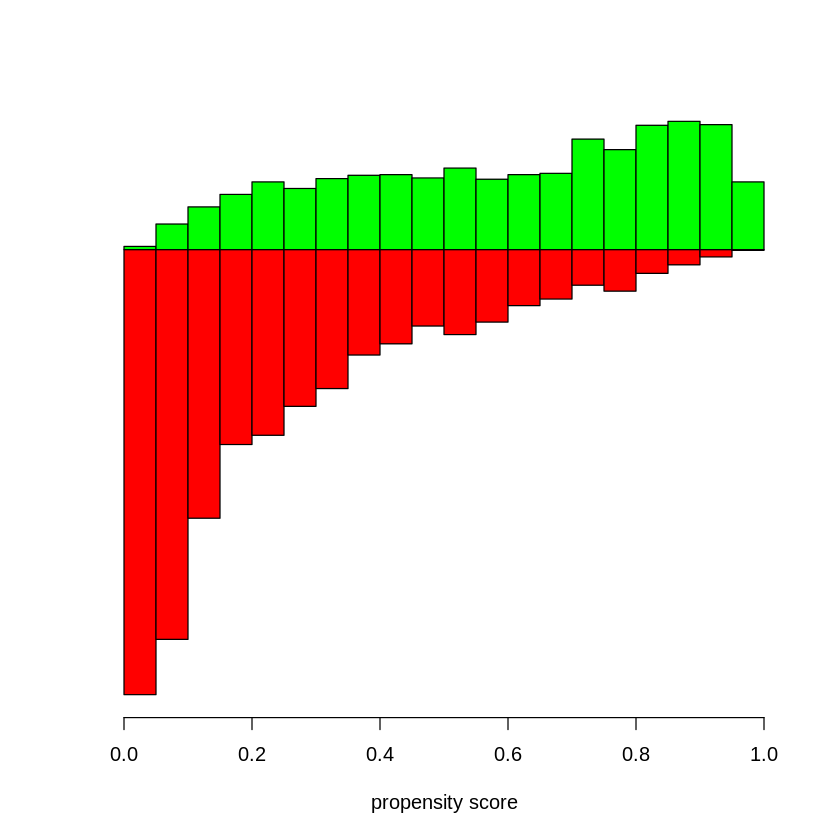

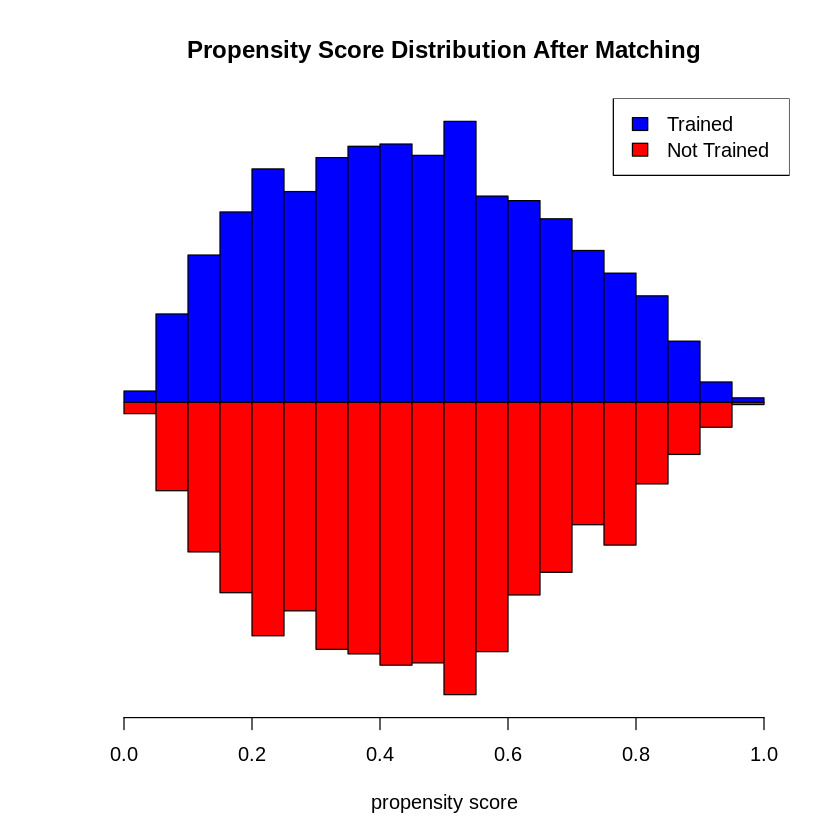

In [ ]:
# Propensity score matching

# Fit propensity score model
psModel <- glm(formula = (training == "Yes") ~ manager+raise+salary+children+mstatus+age+sex+edu+vacation+weight+height+hrfriend+cxofriend+insurance+flexspend+retcont+race+disthome+testscore,family = binomial(link = "logit"), data = tpd)

# Predicted probability of being assigned to Train
tpd$pTrain <- predict(psModel, type = "response")

# Predicted probability of being assigned to no Train
tpd$pNoTrain <- 1 - tpd$pTrain

# Create plot to check overlap
hTrain = hist(tpd$pTrain[tpd$training=="Yes"], plot=FALSE,breaks=20)
hNoTrain = hist(tpd$pTrain[tpd$training=="No"], plot=FALSE,breaks=20)
hNoTrain$counts = - hNoTrain$counts
hmax = max(hTrain$counts)
hmin = min(hNoTrain$counts)
plotx = c(hTrain$breaks, hNoTrain$breaks)
xmax = max(plotx)
xmin = min(plotx)
plot(hTrain, ylim=c(hmin, hmax), col="Green", xlim=c(xmin, xmax), xlab='propensity score',main="",yaxt='n',ylab='')
lines(hNoTrain, col="red")

set.seed(1) ## Set random number seed

# Perform 1:1 Propensity Score Matching
listPSMatch <- Match(Tr = (tpd$training == "Yes"), X = log(tpd$pTrain / tpd$pNoTrain),
M = 1, caliper = 0.2, replace = FALSE, ties = TRUE, version = "fast")

# Extract matched data
tpdPSMatched <- tpd[unlist(listPSMatch[c("index.treated","index.control")]), ]

vars_new <-c("manager", "raise", "salary","children",
               "mstatus", "age", "sex", "edu", "vacation", "weight",
               "height" , "hrfriend" , "cxofriend" , "insurance",
               "flexspend" , "retcont" , "race", "disthome","testscore")

# Construct a table
tabPSMatched <- CreateTableOne(vars = vars_new, strata = "training", data = tpdPSMatched, test = FALSE)

# Show table after propensity score matching
print(tabPSMatched, smd = TRUE)

# Create plot to check overlap AFTER matching
hTrainMatched = hist(tpdPSMatched$pTrain[tpdPSMatched$training=="Yes"], plot=FALSE, breaks=20)
hNoTrainMatched = hist(tpdPSMatched$pTrain[tpdPSMatched$training=="No"], plot=FALSE, breaks=20)
hNoTrainMatched$counts = -hNoTrainMatched$counts
hmaxMatched = max(hTrainMatched$counts)
hminMatched = min(hNoTrainMatched$counts)
plot(hTrainMatched, ylim=c(hminMatched, hmaxMatched), col="blue", xlim=c(xmin, xmax),
     xlab='propensity score', main="Propensity Score Distribution After Matching",
     yaxt='n', ylab='')
lines(hNoTrainMatched, col="red")
legend("topright", legend=c("Trained", "Not Trained"), fill=c("blue", "red"))

## Processing Without 'disthome'

In [ ]:
# Propensity score matching

# Fit propensity score model
psModel <- glm(formula = (training == "Yes") ~ manager+raise+salary+children+mstatus+age+sex+edu+vacation+weight+height+hrfriend+cxofriend+insurance+flexspend+retcont+race+testscore,family = binomial(link = "logit"), data = tpd)

# Predicted probability of being assigned to Train
tpd$pTrain <- predict(psModel, type = "response")

# Predicted probability of being assigned to no Train
tpd$pNoTrain <- 1 - tpd$pTrain

# Create plot to check overlap
hTrain = hist(tpd$pTrain[tpd$training=="Yes"], plot=FALSE,breaks=20)
hNoTrain = hist(tpd$pTrain[tpd$training=="No"], plot=FALSE,breaks=20)
hNoTrain$counts = - hNoTrain$counts
hmax = max(hTrain$counts)
hmin = min(hNoTrain$counts)
plotx = c(hTrain$breaks, hNoTrain$breaks)
xmax = max(plotx)
xmin = min(plotx)
plot(hTrain, ylim=c(hmin, hmax), col="Green", xlim=c(xmin, xmax), xlab='propensity score',main="",yaxt='n',ylab='')
lines(hNoTrain, col="red")

set.seed(1) ## Set random number seed

# Perform 1:1 Propensity Score Matching
listPSMatch <- Match(Tr = (tpd$training == "Yes"), X = log(tpd$pTrain / tpd$pNoTrain),
M = 1, caliper = 0.2, replace = FALSE, ties = TRUE, version = "fast")

# Extract matched data
tpdPSMatched <- tpd[unlist(listPSMatch[c("index.treated","index.control")]), ]

vars_new <-c("manager", "raise", "salary","children",
               "mstatus", "age", "sex", "edu", "vacation", "weight",
               "height" , "hrfriend" , "cxofriend" , "insurance",
               "flexspend" , "retcont" , "race","testscore")

# Construct a table
tabPSMatched <- CreateTableOne(vars = vars_new, strata = "training", data = tpdPSMatched, test = FALSE)

# Show table after propensity score matching
print(tabPSMatched, smd = TRUE)

# Create plot to check overlap AFTER matching
hTrainMatched = hist(tpdPSMatched$pTrain[tpdPSMatched$training=="Yes"], plot=FALSE, breaks=20)
hNoTrainMatched = hist(tpdPSMatched$pTrain[tpdPSMatched$training=="No"], plot=FALSE, breaks=20)
hNoTrainMatched$counts = -hNoTrainMatched$counts
hmaxMatched = max(hTrainMatched$counts)
hminMatched = min(hNoTrainMatched$counts)
plot(hTrainMatched, ylim=c(hminMatched, hmaxMatched), col="blue", xlim=c(xmin, xmax),
     xlab='propensity score', main="Propensity Score Distribution After Matching",
     yaxt='n', ylab='')
lines(hNoTrainMatched, col="red")
legend("topright", legend=c("Trained", "Not Trained"), fill=c("blue", "red"))

## McNemar test

In [ ]:
# McNemar Test

ps_pairs <- data.frame(
  treated_outcome = tpd$promoted[listPSMatch$index.treated],
  control_outcome = tpd$promoted[listPSMatch$index.control]
)

nrow(ps_pairs)

ps_indata <- matrix(c(
  sum(ps_pairs$treated_outcome == "Yes" & ps_pairs$control_outcome == "Yes"),
  sum(ps_pairs$treated_outcome == "Yes" & ps_pairs$control_outcome == "No"),
  sum(ps_pairs$treated_outcome == "No" & ps_pairs$control_outcome =="Yes"),
  sum(ps_pairs$treated_outcome == "No" & ps_pairs$control_outcome == "No")),2,2)
ps_indata

mcnemar.test(ps_indata)

[1] 1944

795,200
635,314



	McNemar's Chi-squared test with continuity correction

data:  ps_indata
McNemar's chi-squared = 225.58, df = 1, p-value < 2.2e-16


In [ ]:
# Assuming the initial setup and propensity score calculation is done

# Define a range of gamma values for sensitivity analysis
gamma_range <- seq(0.5, 1, by = 0.1)

# Initialize a list to store results for each gamma
results <- list()

for (gamma in gamma_range) {
    # Adjust caliper based on current gamma value
    caliper_value <- gamma  # Example adjustment, adapt based on your analysis needs

    # Perform 1:1 Propensity Score Matching with adjusted caliper
    listPSMatch <- Match(Tr = (tpd$training == "Yes"),
                         X = log(tpd$pTrain / tpd$pNoTrain),
                         M = 1, caliper = caliper_value, replace = FALSE,
                         ties = TRUE, version = "fast")

    # Extract matched data
    tpdPSMatched <- tpd[unlist(listPSMatch[c("index.treated","index.control")]), ]

    # Construct a balance table for the matched data
    tabPSMatched <- CreateTableOne(vars = vars_new, strata = "training", data = tpdPSMatched, test = FALSE)

    # Store the table in the results list
    results[[paste("Gamma", gamma)]] <- tabPSMatched
}

# Example of accessing results for a specific gamma value
print(results[["Gamma 0.5"]])
print(results[["Gamma 1"]])


                        Stratified by training
                         No             Yes           
  n                        1521           1521        
  manager = Yes (%)         220 (14.5)     226 (14.9) 
  raise = Yes (%)           522 (34.3)     499 (32.8) 
  salary (%)                                          
     > $80k                 127 ( 8.3)     130 ( 8.5) 
     $20-$40k               320 (21.0)     307 (20.2) 
     $40-$80k               236 (15.5)     242 (15.9) 
     Under $20k             838 (55.1)     842 (55.4) 
  children (mean (SD))     1.41 (1.20)    1.43 (1.21) 
  mstatus (%)                                         
     divorced               330 (21.7)     336 (22.1) 
     married                343 (22.6)     353 (23.2) 
     single                 848 (55.8)     832 (54.7) 
  age (mean (SD))         42.50 (11.61)  42.55 (10.97)
  sex = Male (%)            837 (55.0)     855 (56.2) 
  edu (mean (SD))         11.68 (3.09)   11.74 (3.15) 
  vacation (mean (

In [ ]:
# Assuming the initial setup and propensity score calculation is done

# Define a range of gamma values for sensitivity analysis
gamma_range <- seq(0.01, 1, by = 0.01)

# Initialize variables to store the best gamma value and its results
best_gamma <- NA
best_gamma_pvalue <- 1

for (gamma in gamma_range) {
    # Perform 1:1 Propensity Score Matching with adjusted caliper
    listPSMatch <- Match(Tr = (tpd$training == "Yes"),
                         X = log(tpd$pTrain / tpd$pNoTrain),
                         M = 1, caliper = gamma, replace = FALSE,
                         ties = TRUE, version = "fast")

    # Extract matched data
    tpdPSMatched <- tpd[unlist(listPSMatch[c("index.treated","index.control")]), ]

# Adjusted part for McNemar test data preparation
ps_pairs <- data.frame(
  treated_outcome = tpdPSMatched$promoted[match(listPSMatch$index.treated, row.names(tpdPSMatched))],
  control_outcome = tpdPSMatched$promoted[match(listPSMatch$index.control, row.names(tpdPSMatched))]
)

# Ensure no NA values are included in the analysis
ps_pairs <- na.omit(ps_pairs)

# Constructing the matrix for the McNemar test
ps_indata <- matrix(c(
  sum(ps_pairs$treated_outcome == "Yes" & ps_pairs$control_outcome == "Yes"),
  sum(ps_pairs$treated_outcome == "Yes" & ps_pairs$control_outcome == "No"),
  sum(ps_pairs$treated_outcome == "No" & ps_pairs$control_outcome == "Yes"),
  sum(ps_pairs$treated_outcome == "No" & ps_pairs$control_outcome == "No")), 2, 2, byrow = TRUE)

if(all(ps_indata >= 0)) {
  mcnemar.test(ps_indata)
} else {
  cat("Error: Negative or non-finite entries found in the contingency matrix.")
}
}

# Print the best gamma value and its McNemar test p-value
if (!is.na(best_gamma)) {
  cat("Best Gamma:", best_gamma, "with McNemar test p-value:", best_gamma_pvalue, "\n")
} else {
  cat("No gamma value resulted in a p-value less than 0.05\n")
}


No gamma value resulted in a p-value less than 0.05


In [ ]:
## Unmatched model
glmUnmatched <- glm(formula = (promoted == "Yes") ~ training,
                     family  = binomial(link = "logit"),
                     data    = tpd)

## Matched model
glmMatched <- glm(formula = (promoted == "Yes") ~ training,
                   family  = binomial(link = "logit"),
                   data    = tpdMatched)

## Propensity Score Matched model (caliper=0.01)
glmPSMatched <- glm(formula = (promoted == "Yes") ~ training,
                   family  = binomial(link = "logit"),
                   data    = tpdPSMatched)

## Show results together
resTogether <- list(Unmatched = ShowRegTable(glmUnmatched, printToggle = FALSE),
                    Matched   = ShowRegTable(glmMatched, printToggle = FALSE),
                    PSMatched   = ShowRegTable(glmPSMatched, printToggle = FALSE))
print(resTogether, quote = FALSE)

$Unmatched
            exp(coef) [confint] p     
(Intercept) 1.72 [1.61, 1.84]   <0.001
trainingYes 1.24 [1.11, 1.39]   <0.001

$Matched
            exp(coef) [confint] p     
(Intercept) 1.73 [1.51, 2.00]   <0.001
trainingYes 1.63 [1.32, 2.01]   <0.001

$PSMatched
            exp(coef) [confint] p     
(Intercept) 1.05 [0.96, 1.15]    0.297
trainingYes 2.65 [2.32, 3.04]   <0.001



# 6. IPTW

## Processing

In [ ]:
## Weighted analysis
install.packages("survey")
##install.packages("tableone")

library(survey)
library(tableone)
tpd <- read.csv("TrainingPromoData.csv")
vars <-c("manager", "raise", "salary","children",
               "mstatus", "age", "sex", "edu", "vacation", "weight",
               "height" , "hrfriend" , "cxofriend" , "insurance",
               "flexspend" , "retcont" , "race","disthome","testscore")

## Fit model
psModel <- glm(formula = (training == "Yes") ~
manager +raise+salary+children+
               mstatus+age+sex+edu+vacation+weight+
               +height+hrfriend+cxofriend+insurance+
               +flexspend+retcont+race+disthome+testscore
family = binomial(link = "logit"), data = tpd)

## Predicted probability of being assigned to Train
tpd$pTrain <- predict(psModel, type = "response")

## Predicted probability of being assigned to no Train
tpd$pNoTrain <- 1 - tpd$pTrain

tpd$pAssign <- NA
tpd$pAssign[tpd$training == "Yes"] <- tpd$pTrain[tpd$training ==
"Yes"]
tpd$pAssign[tpd$training == "No"] <- tpd$pNoTrain[tpd$training
== "No"]

tpd$mw <- 1 / tpd$pAssign
## Weighted data
tpdSvy <- svydesign(ids = ~ 1, data = tpd, weights = ~ mw)
## Construct a Table 1
tabWeighted <- svyCreateTableOne(vars = vars, strata =
"training", data = tpdSvy, test = FALSE)
## Show table with SMD
print(tabWeighted, smd = TRUE)

ERROR: Error in parse(text = x, srcfile = src): <text>:18:58: unexpected input
17:                +height+hrfriend+cxofriend+insurance+
18:                +flexspend+retcont+race+disthome+testscore，
                                                             ^


In [ ]:

## Unmatched model
glmUnmatched <- glm(formula = (promoted == "Yes") ~ training,
family = binomial(link = "logit"),
data = tpd)
## Matched model (caliper=1.24)
glmMatched <- glm(formula = (promoted == "Yes") ~ training,
family = binomial(link = "logit"),
data = tpdMatched)
## Propensity Score Matched model (caliper=0.01)
glmPSMatched <- glm(formula = (promoted == "Yes") ~ training,
family = binomial(link = "logit"),
data = tpdPSMatched)
## Weighted model
glmWeighted <- svyglm(formula = (promoted == "Yes") ~ training,
family = binomial(link = "logit"),
design = tpdSvy)
## Show results together
resTogether <- list(Unmatched = ShowRegTable(glmUnmatched, printToggle = FALSE),
Matched = ShowRegTable(glmMatched, printToggle = FALSE),
PSMatched = ShowRegTable(glmPSMatched, printToggle = FALSE),
Weighted = ShowRegTable(glmWeighted, printToggle = FALSE))
print(resTogether, quote = FALSE)

**Sensitivity Using Different Gamma**

In [ ]:
if(!requireNamespace("ipw", quietly = TRUE)) install.packages("ipw")
library(ipw)

gamma_range <- seq(0.5, 2, by = 0.1)
results <- list()

for(gamma in gamma_range) {
  adjusted_weights <- ifelse(tpd$training == "Yes", tpd$mw * gamma, tpd$mw / gamma)

  tpdSvyAdjusted <- svydesign(ids = ~1, data = tpd, weights = ~adjusted_weights)

  tabWeightedAdjusted <- svyCreateTableOne(vars = vars, strata = "training", data = tpdSvyAdjusted, test = FALSE)

  results[[as.character(gamma)]] <- tabWeightedAdjusted
}

print(results[["0.5"]])
print(results[["1"]])



                        Stratified by training
                         No               Yes            
  n                       12003.7          3001.4        
  manager = Yes (%)        1710.5 (14.3)    429.6 (14.3) 
  raise = Yes (%)          4415.1 (36.8)   1124.3 (37.5) 
  salary (%)                                             
     > $80k                 936.6 ( 7.8)    238.4 ( 7.9) 
     $20-$40k              2436.3 (20.3)    606.9 (20.2) 
     $40-$80k              1875.1 (15.6)    464.0 (15.5) 
     Under $20k            6755.7 (56.3)   1692.1 (56.4) 
  children (mean (SD))       1.39 (1.19)     1.39 (1.18) 
  mstatus (%)                                            
     divorced              2758.5 (23.0)    708.5 (23.6) 
     married               2583.4 (21.5)    653.1 (21.8) 
     single                6661.8 (55.5)   1639.8 (54.6) 
  age (mean (SD))           42.99 (11.76)   42.97 (11.26)
  sex = Male (%)           6655.1 (55.4)   1672.1 (55.7) 
  edu (mean (SD))        

## McNemar test

# 7. Instrumental Variable


##7.1 stage1 model

In [ ]:
# Convert 'Yes' and 'No' to 1 and 0 for 'training' and 'promoted' variables
tpd$training_num <- ifelse(tpd$training == "Yes", 1, 0)
tpd$promoted_num <- ifelse(tpd$promoted == "Yes", 1, 0)

small_value <- 1e-6

# Stage 1: Use 'disthome' as an instrumental variable to predict the endogenous variable 'training'
# Replace 'training' with 'training_num' as the outcome in the regression since 'training' is a character variable
stage1mod <- lm(training_num ~ disthome + manager + raise + salary + log(children + small_value) + mstatus + age + sex + edu + log(vacation+ small_value) + log(weight+ small_value) + log(height+ small_value) + hrfriend + cxofriend + insurance + flexspend + retcont + race + testscore, data=tpd)

#stage1mod <- lm(training_num ~ disthome + manager + raise + salary + children + mstatus + age + sex + edu + vacation + weight + height + hrfriend + cxofriend + insurance + flexspend + retcont + race + testscore, data=tpd)

summary(stage1mod)



Call:
lm(formula = training_num ~ disthome + manager + raise + salary + 
    log(children + small_value) + mstatus + age + sex + edu + 
    log(vacation + small_value) + log(weight + small_value) + 
    log(height + small_value) + hrfriend + cxofriend + insurance + 
    flexspend + retcont + race + testscore, data = tpd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97614 -0.31627 -0.04274  0.31216  1.02689 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.9675772  0.2365697   4.090 4.37e-05 ***
disthome                     -0.0210950  0.0005255 -40.147  < 2e-16 ***
managerYes                   -0.0105888  0.0234904  -0.451  0.65217    
raiseYes                     -0.0827648  0.0112165  -7.379 1.81e-13 ***
salary.L                      0.0182975  0.0239362   0.764  0.44464    
salary.Q                      0.0020481  0.0139120   0.147  0.88296    
salary.C                     -0.0044576  0.0132593  -

In [ ]:
# check significance in one feature in lm model
stage1mod_onefeature <- lm(training_num ~ disthome,data = tpd)
summary(stage1mod_onefeature)



Call:
lm(formula = training_num ~ disthome, data = tpd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63956 -0.35388 -0.06819  0.36044  0.81278 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.9014460  0.0132453   68.06   <2e-16 ***
disthome    -0.0238074  0.0005525  -43.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4246 on 5998 degrees of freedom
Multiple R-squared:  0.2364,	Adjusted R-squared:  0.2363 
F-statistic:  1857 on 1 and 5998 DF,  p-value: < 2.2e-16


In [ ]:
# Check the correlation between the instrumental variable 'disthome' and the treatment variable 'training_num'
cor.test(tpd$disthome, tpd$training_num)


	Pearson's product-moment correlation

data:  tpd$disthome and tpd$training_num
t = -43.094, df = 5998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5053138 -0.4666646
sample estimates:
      cor 
-0.486227 


In [ ]:
# Calculate the correlation between the instrumental variable and the outcome variable (assumed to be 'promoted')
# Replace 'promoted' with 'promoted_num' since 'promoted' is a character variable
cor.test(tpd$disthome, tpd$promoted_num)

# Get the predicted values of the endogenous variable 'training' from the first stage regression model
tpd$training_est <- predict(stage1mod, type="response")


	Pearson's product-moment correlation

data:  tpd$disthome and tpd$promoted_num
t = -3.1853, df = 5998, p-value = 0.001453
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06632926 -0.01580677
sample estimates:
        cor 
-0.04109428 


##7.2 stage 2 model

In [ ]:
# Stage 2: Use the predicted values from stage 1 to estimate the effect on promotion
stage2mod <- lm(promoted_num ~ training_est + manager + raise + salary + log(children + small_value) + mstatus + age + sex + edu + log(vacation+ small_value) + log(weight+ small_value) + log(height+ small_value) + hrfriend + cxofriend + insurance + flexspend + retcont + race + testscore, data=tpd)

summary(stage2mod)
#stage2mod <- lm(promoted_num ~ training_est, data=tpd)
# Output the summary of the model


Call:
lm(formula = promoted_num ~ training_est + manager + raise + 
    salary + log(children + small_value) + mstatus + age + sex + 
    edu + log(vacation + small_value) + log(weight + small_value) + 
    log(height + small_value) + hrfriend + cxofriend + insurance + 
    flexspend + retcont + race + testscore, data = tpd)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31838 -0.28010  0.06558  0.29314  0.90157 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.2294759  0.2267229   1.012 0.311511    
training_est                  0.2322083  0.0238808   9.724  < 2e-16 ***
managerYes                    0.0192026  0.0225209   0.853 0.393883    
raiseYes                     -0.0315289  0.0110470  -2.854 0.004331 ** 
salary.L                     -0.0515383  0.0229466  -2.246 0.024740 *  
salary.Q                      0.0041472  0.0133380   0.311 0.755861    
salary.C                      0.0027245  0.012711

In [ ]:
exp(stage2mod$coefficients["training_est"])

training_est 
    1.261382

In [ ]:
system('sudo apt install fastDummies')
install.packages('ivreg')
install.packages('AER')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘zoo’, ‘car’, ‘Formula’, ‘lmtest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sandwich’




In [ ]:
#another method: use iverg to show the result
library(ivreg)
library(AER)

# Assuming 'ivmod' is the result of an 'ivreg' model run with 'disthome' as an IV
ivmod <- ivreg(promoted_num ~ training_num + manager + raise + salary + children + mstatus + age + sex + edu + vacation + weight + height + hrfriend + cxofriend + insurance + flexspend + retcont + race + testscore |
               disthome + manager + raise + salary + children + mstatus + age + sex + edu + vacation + weight + height + hrfriend + cxofriend + insurance + flexspend + retcont + race + testscore, data=tpd)

# Summary of the ivreg model which contains some diagnostics
summary_ivmod <- summary(ivmod, diagnostics = TRUE)

# Output the summary
print(summary_ivmod)

# Wald test for overall significance of the model
waldtest <- waldtest(ivmod)
print(waldtest)


# Check the regression for heteroskedasticity
# Breusch-Pagan test
bp_test <- bptest(ivmod)
print(bp_test)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival

Registered S3 methods overwritten by 'AER':
  method              from 
  print.ivreg         ivreg
  print.summary.ivreg ivreg
  summary.ivreg       ivreg
  vcov.ivreg          ivreg
  bread.ivreg         ivreg
  estfun.ivreg        ivreg
  hatvalues.ivreg     ivreg
  predict.ivreg       ivreg
  anova.ivreg         ivreg
  terms.ivreg         ivreg
  model.matrix.ivreg  ivreg
  update.ivreg        ivreg


Attaching package: ‘AER’


The following objects are masked from ‘package:ivreg’:

    ivreg, ivreg.fit





Call:
ivreg(formula = promoted_num ~ training_num + manager + raise + 
    salary + children + mstatus + age + sex + edu + vacation + 
    weight + height + hrfriend + cxofriend + insurance + flexspend + 
    retcont + race + testscore | disthome + manager + raise + 
    salary + children + mstatus + age + sex + edu + vacation + 
    weight + height + hrfriend + cxofriend + insurance + flexspend + 
    retcont + race + testscore, data = tpd)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25323 -0.25159  0.05996  0.27593  0.99565 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -0.4271457  0.0699164  -6.109 1.06e-09 ***
training_num                  0.2302232  0.0231983   9.924  < 2e-16 ***
managerYes                    0.0182597  0.0219010   0.834 0.404462    
raiseYes                     -0.0315479  0.0107495  -2.935 0.003350 ** 
salary.L                     -0.0485699  0.0223231  -2.176 0.029612 *  
sa